In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression

In [2]:
r = pd.read_csv(r"C:\Users\krunal sheth\Downloads\UCI HAR Dataset\features.txt",sep= ' ', header=None)
r.drop([0],axis = 1, inplace = True)
r.head(3)

,1
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z


In [3]:
col_names = r[1].tolist()

In [4]:
file_xtrain = pd.read_csv(r"C:\Users\krunal sheth\Downloads\UCI HAR Dataset\train\X_train.txt",sep= ',', header=None)
file_xtrain = file_xtrain[0].str.split(expand=True).astype(float)
file_xtrain.columns = col_names
file_xtrain.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [5]:
columns = ['Activity']

In [6]:
file_ytrain = pd.read_csv(r"C:\Users\krunal sheth\Downloads\UCI HAR Dataset\train\y_train.txt",names = columns, sep= ',', header=None)
file_ytrain.head(3)

,Activity
0,5
1,5
2,5


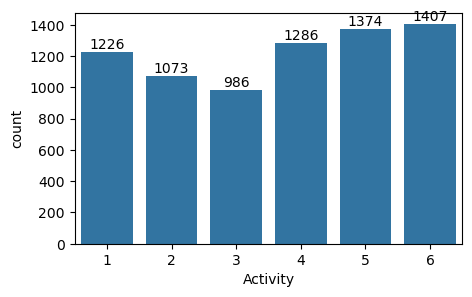

In [7]:
plt.figure(figsize = (5,3))
ax = sns.countplot(data = file_ytrain, x = 'Activity')
ax.bar_label(ax.containers[0])
plt.show()

In [8]:
file_xtest = pd.read_csv(r"C:\Users\krunal sheth\Downloads\UCI HAR Dataset\test\X_test.txt", sep= ',', header=None)
file_xtest = file_xtest[0].str.split(expand=True).astype(float)
file_xtest.columns = col_names
file_xtest.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346


In [9]:
file_ytest = pd.read_csv(r"C:\Users\krunal sheth\Downloads\UCI HAR Dataset\test\y_test.txt",names = columns, sep= ',', header=None)
file_ytest.head(3)

,Activity
0,5
1,5
2,5


In [10]:
file_ytest.shape

(2947, 1)

In [11]:
# combine x_train,x_test dataset

In [12]:
df= pd.concat([file_xtrain,file_xtest])
df.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [13]:
df.shape

(10299, 561)

In [14]:
print(df.index.is_unique)

False


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
# combine y_train,y_test dataset

In [17]:
df1= pd.concat([file_ytrain,file_ytest])
df1.head(3)

,Activity
0,5
1,5
2,5


In [18]:
df1['Activity'].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [19]:
df1['Activity'] = df1['Activity'].map({1 : 'WALKING',2 : 'WALKING_UPSTAIRS',3 : 'WALKING_DOWNSTAIRS',4 : 'SITTING',5 : 'STANDING',6: 'LAYING'})

In [20]:
df1.shape

(10299, 1)

In [21]:
print(df1.index.is_unique)

False


In [22]:
df1.reset_index(drop=True, inplace=True)

In [23]:
def distinct_columns_in_high_corr(df, threshold=0.90):
    corr_matrix = df.corr()
    cols = corr_matrix.columns
    high_corr_cols = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold and abs(corr_value) < 1.0:
                high_corr_cols.add(cols[i])
                high_corr_cols.add(cols[j])

    return high_corr_cols

high_corr_columns = distinct_columns_in_high_corr(df)
print(f"Number of distinct columns in highly correlated pairs: {len(high_corr_columns)}")

Number of distinct columns in highly correlated pairs: 345


In [24]:
def reduce_features_by_correlation(df, threshold=0.90):
    corr_matrix = df.corr()
    cols = corr_matrix.columns
    to_remove = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold and abs(corr_value) < 1.0:
                # Mark the second column for removal
                if cols[j] not in to_remove:
                    to_remove.add(cols[j])

    # Create reduced dataframe without the highly correlated columns
    reduced_df = df.drop(columns=list(to_remove))
    return reduced_df, to_remove

reduced_df, removed_columns = reduce_features_by_correlation(df)
print(f"Removed {len(removed_columns)} columns to reduce multicollinearity.")

Removed 298 columns to reduce multicollinearity.


In [25]:
reduced_df.shape

(10299, 201)

In [26]:
df_num = reduced_df
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1

outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()
outliers

tBodyAcc-mean()-X                       2437
tBodyAcc-mean()-Y                       1525
tBodyAcc-mean()-Z                       1548
tBodyAcc-std()-X                           3
tBodyAcc-std()-Z                          13
                                        ... 
fBodyBodyGyroJerkMag-skewness()          175
angle(tBodyAccMean,gravity)             1476
angle(tBodyAccJerkMean),gravityMean)       0
angle(tBodyGyroMean,gravityMean)           0
angle(tBodyGyroJerkMean,gravityMean)       0
Length: 201, dtype: int64

In [27]:
x = reduced_df
y = df1

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_train

array([[-0.09954355,  0.0481379 ,  0.79820598, ...,  0.46726769,
        -0.62281253, -0.69738916],
       [ 0.04330388,  0.09766459, -0.07430341, ...,  0.73259032,
         0.03266122,  0.25566652],
       [-0.75586406, -0.82980555,  0.05611677, ...,  1.08727017,
        -1.38453118, -1.22046044],
       ...,
       [ 0.29538058, -0.02276938, -0.20743104, ..., -1.09660177,
         0.12792447, -0.58359178],
       [ 0.09369383, -0.03989422, -0.09258327, ...,  0.02486463,
        -0.49437725,  1.26014158],
       [-0.15922023,  0.65878753,  0.2511716 , ..., -1.56996314,
        -0.40803493,  0.73077867]])

In [31]:
arr = pd.DataFrame(x_scaled_train,columns = x.columns)
arr.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
count,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,...,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03,7.209000e+03
mean,-1.715001e-16,3.498997e-17,8.624288e-17,1.049699e-16,8.525724e-17,-9.363512e-18,-6.406614e-18,-6.554459e-17,2.069829e-17,4.139658e-17,...,1.133478e-17,1.089124e-16,-1.734714e-16,4.514199e-16,-1.983586e-17,1.182759e-17,-1.084196e-17,1.921984e-17,3.252588e-17,-2.661209e-17
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.907707e+01,-1.800070e+01,-1.661670e+01,-8.970746e-01,-9.629218e-01,-1.946352e+00,-2.018021e+00,-2.306605e+00,-2.523135e+00,-4.497100e+00,...,-3.415080e+00,-2.278492e+00,-6.769439e-01,-7.060827e-01,-4.613638e+00,-2.153675e+00,-2.990484e+00,-2.237304e+00,-1.637752e+00,-2.014167e+00
25%,-1.765722e-01,-1.950075e-01,-2.331309e-01,-8.798445e-01,-9.110904e-01,-1.004310e+00,-9.738134e-01,-9.177985e-01,-8.223847e-01,-7.587357e-01,...,-6.957248e-01,-7.245727e-01,-6.430489e-01,-4.838345e-01,-5.938046e-01,-7.467193e-01,-3.934856e-01,-6.462502e-01,-8.416729e-01,-7.952893e-01
50%,4.328622e-02,9.254430e-03,4.427092e-03,-7.645025e-01,-5.744129e-01,9.568423e-02,9.582467e-02,6.599255e-02,-5.594455e-02,-1.235428e-01,...,-4.316405e-02,-1.644618e-01,-5.325472e-01,-3.933812e-02,3.273038e-02,-1.154055e-01,8.407729e-04,8.198825e-03,1.083468e-03,7.330287e-04
75%,2.142759e-01,1.919033e-01,2.098765e-01,8.180544e-01,8.254351e-01,9.271976e-01,9.463552e-01,8.845255e-01,8.203144e-01,7.163972e-01,...,6.908951e-01,5.458250e-01,3.331698e-01,1.829101e-01,6.615300e-01,5.826364e-01,4.235324e-01,6.409140e-01,8.427388e-01,7.815810e-01
max,6.079217e+00,2.744345e+01,2.067354e+01,3.656141e+00,3.992929e+00,2.374434e+00,2.595600e+00,3.155639e+00,3.302091e+00,3.613808e+00,...,3.725276e+00,3.818843e+00,9.480086e+00,1.329555e+01,3.348191e+00,3.970947e+00,2.943904e+00,2.223285e+00,1.584595e+00,2.075223e+00


In [32]:
x_scaled_test = scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(x_scaled_train,y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# prediction

In [35]:
row1 = reduced_df.loc[1]

In [36]:
pre = scaler.transform([row1])

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
lr.predict(pre)

array(['STANDING'], dtype=object)

In [38]:
lr.score(x_scaled_train,y_train)

0.9861284505479262

In [39]:
lr.score(x_scaled_test,y_test)

0.9705501618122977

# confusion matrix

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

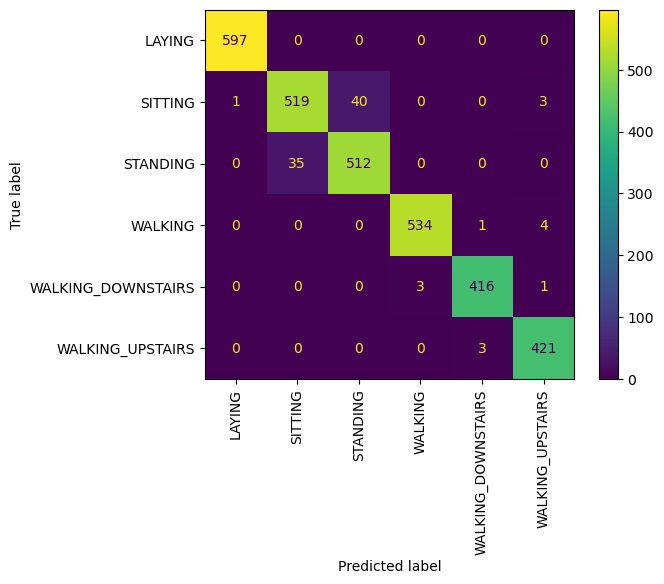

In [41]:
ConfusionMatrixDisplay.from_estimator(lr, x_scaled_test, y_test)
plt.xticks(rotation=90)
plt.show()

In [42]:
y_pred = lr.predict(x_scaled_test)
y_pred

array(['WALKING', 'LAYING', 'STANDING', ..., 'SITTING', 'STANDING',
       'WALKING_UPSTAIRS'], dtype=object)

In [43]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       597
           SITTING       0.94      0.92      0.93       563
          STANDING       0.93      0.94      0.93       547
           WALKING       0.99      0.99      0.99       539
WALKING_DOWNSTAIRS       0.99      0.99      0.99       420
  WALKING_UPSTAIRS       0.98      0.99      0.99       424

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



In [44]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [45]:
def plot_multiclass_roc(clf, x_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(x_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="lower right",fontsize=8)
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

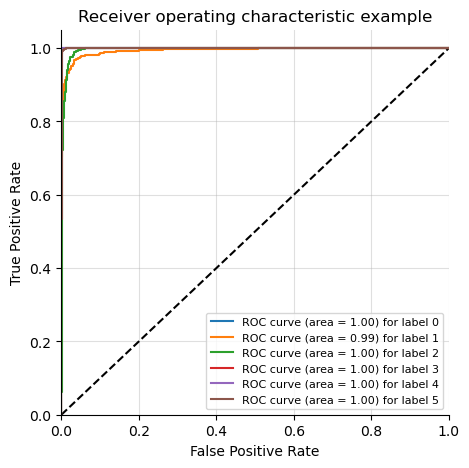

In [46]:
plot_multiclass_roc(lr, x_scaled_test, y_test, n_classes = 6)

# RandomizedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy import stats

In [48]:
# Random search for 20 combinations of parameters

rand_list = {"C": stats.uniform(2,10)}

rand_search = RandomizedSearchCV(lr, param_distributions = rand_list , n_iter = 20, n_jobs = 4, cv = 3, random_state = 42)

In [49]:
rand_search.fit(x_scaled_train, y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014D0E37B8F0>},
                   random_state=42)

In [50]:
rand_search.score(x_scaled_train, y_train)

0.9883478984602581

# Grid search Cv

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
model = LogisticRegression(solver = 'saga',multi_class = 'ovr', max_iter = 10000)

In [53]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [54]:
grid_model = GridSearchCV(model, param_grid = param_grid)

In [55]:
# grid_model.fit(x_scaled_train, y_train)

In [56]:
# grid_model.score(x_scaled_train, y_train)